In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from dna2vec.multi_k_model import MultiKModel
import seaborn as sns
%matplotlib inline

In [2]:
filepath = 'pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v'
mk_model = MultiKModel(filepath)

In [3]:
mk_model.vector('AAA').shape

(100,)

In [59]:
#### Read fasta ####
def read_FASTA(file_name):
    with open(file_name, "r") as fn:
        text = fn.read().split(">")
    text = [x.split("\n") for x in text if x != ""]
    text = [[x[0],"".join(x[1:]).upper()] for x in text]
    text_dict = {line[0].split('|')[0]:line[1] for line in text}
    return text_dict

# Data

In [122]:
code = read_FASTA("../../data/FINAL_DATA_1/fasta_for_test/train_fasta_gencode.fasta")
noncode = read_FASTA("../../data/FINAL_DATA_1/fasta_for_test/train_fasta_lncPedia.fasta")

In [63]:
test_code = read_FASTA("../../data/FINAL_DATA_1/fasta_for_test/val_fasta_gencode.fasta")
test_noncode = read_FASTA("../../data/FINAL_DATA_1/fasta_for_test/val_fasta_lncPedia.fasta")

In [7]:
for k,v in code.items():
    print(k, v)
    break

ENST00000357864.2 CAGTGAGTTAGCATGGAGGGCAGTGGGACCGGAAAAAGACGTGGAAAAGCTGCGAAAACGAGCCTTCGAATCATGGACGCGCGGGCCCAGCTCCTCCTCCGAGTTCCTCATCCGGGGCCGTCACTCACATCCGGGGCCCTCACTCACATCCGGGACCCTCATCCGGGGCTCTCACCCACATCCGGGACCCTCATGCCTGGGCGGAGGAGGGGGGGCCCTCATTCGGGACCCTGCACTCCGTCGCCGGAAGTGCCACCGAGAAGCGCCGGCCTCGGGGCTGTCTACAGCGGCCCGGGAGAGGCTGTGGTGGCCCCGAGCGCGAGTGTGTAGGTGACAGGACAGCGGCCAGGCCCGCCCCTCCCCTCGTGATGGTCATTGTCCTCCAGAGCAGTGATGGAGGAAATACCAGCCCAGGAAGCAGCAGGGTCACCAAGGGTCCAGTTTCAGTCTTTGGAGACCCAGTCTGAGTGTCTGTCCCCAGAGCCTCAGTTTGTGCAGGACACCGACATGGAACAGGGACTCACTGGGGGCATACTTCTCCGCCTTCCCACCACCCGGATTCATAGTGTGAATTCCTGCCCGGCCCTGAGTCATACCCAGGCAAGTGCTTTCTCTGGAGAAACACTTGCCGTCCTTACAGCAGGAATCTCCAAGAGATGGCCCAAGTATCGGCTTCCCATCGATATTGCTCGTCCCTGCTCGGAAACTCCTTTTCCACGATTGTGAGATATTAAAATTGACTGATGGAATAGAAGCTCCCCAGGATGCCACCACTGTGTAAAATCGCAGCTCCTCAAATTACCTCTGTTTAATTTCAAATGTTAGGGTCCAAGGAAGCCCTCTGTTGCAACCAGATATGTTTTGAACCCAGTTCATTCAGAAACCATGGTTGGTGGTCATCATCTACTTGTATTGTGAAAAACCAGAAATTCCAAATTCAGCTCTTCAGTTATGGTCTTTTCATATTATTTTAGAATGTGAA

# Data generator

In [6]:
from tqdm import tqdm

In [79]:
def make_vec(seq, kmer=8, max_length=5000):
    vectors = []
    i = 0
    max_range = min((len(seq)-kmer), max_length)
    for i in range(max_range):
        tmp = seq[i:i+kmer]
        if 'N' in tmp:
            continue
        vec_tmp = mk_model.vector(tmp)
        vectors.append(vec_tmp)
    
    if len(vectors) == 0:
        return []
    return np.mean(vectors, axis=0) 

In [80]:
def make_df_from_dic(dic_list, num_for_class = 1000, kmer=8):
    result_dic = {}
    for i,dic in enumerate(dic_list):
        print("type: ", i)
        lol = list(dic.items())[:num_for_class]
        for j,(k,val) in enumerate(tqdm(lol)):
            result_dic[k] = {'TYPE': i}
            vec = make_vec(val, kmer)
            if len(vec) == 0:
                continue
            for n in range(100):
                result_dic[k].update({str(n):vec[n]})
    return pd.DataFrame(result_dic).T

In [10]:
df_3mer = make_df_from_dic([noncode,code], num_for_class = 3000)

In [35]:
df_8mer = make_df_from_dic([noncode,code], num_for_class = 3000, kmer=8)

2987it [00:07, 413.66it/s]
2997it [00:15, 210.45it/s]

In [10]:
df_8mer.to_csv("vectors_8mer.csv")

In [9]:
df_8mer = pd.read_csv("vectors_8mer.csv", index_col=0)
df_8mer.head()

,0,1,10,11,12,13,14,15,16,17,...,91,92,93,94,95,96,97,98,99,TYPE
ENST00000002165.6,0.003689,0.254581,0.014238,0.091091,-0.000442,0.001545,-0.056720,0.137365,-0.025269,0.007413,...,0.005352,-0.209853,-0.212490,0.167473,-0.064458,-0.090392,-0.164697,-0.126204,-0.029774,1.0
ENST00000004531.10,-0.043409,0.283412,0.054422,0.054727,-0.036419,0.014435,-0.025514,0.139263,-0.045349,-0.014162,...,-0.040117,-0.210883,-0.178781,0.149320,-0.047340,-0.115984,-0.172277,-0.111183,-0.052920,1.0
ENST00000005558.4,-0.033050,0.323022,0.030809,0.088739,0.040822,0.098041,-0.050957,0.122822,-0.010079,-0.035426,...,-0.012589,-0.178201,-0.215189,0.153687,-0.056532,-0.136635,-0.139743,-0.101545,-0.063998,1.0
ENST00000006101.4,0.035741,0.331534,-0.084932,0.095210,0.097590,0.100812,-0.119700,0.080089,-0.097209,-0.058467,...,0.068650,-0.250810,-0.244137,0.241494,-0.067607,-0.044267,-0.091211,-0.193827,-0.107381,1.0
ENST00000011898.5,0.004582,0.303065,-0.053180,0.077485,0.066156,0.094409,-0.154426,0.159862,-0.095405,-0.075168,...,0.077112,-0.223872,-0.263312,0.248244,-0.048247,0.016410,-0.069615,-0.143035,-0.083935,1.0


In [44]:
df.head()

,0,1,10,11,12,13,14,15,16,17,...,91,92,93,94,95,96,97,98,99,TYPE
ENST00000003302.4,0.013014,0.227924,-0.029424,0.072023,0.062128,0.095390,-0.159689,0.004302,-0.032853,-0.079117,...,0.006808,-0.078969,-0.122714,0.283493,-0.055594,0.132653,-0.081758,-0.171676,-0.075468,1.0
ENST00000004531.10,0.005034,0.218099,-0.021391,0.062405,0.038848,0.059509,-0.153098,0.006686,-0.028458,-0.069184,...,-0.002370,-0.088688,-0.114525,0.269773,-0.055501,0.129165,-0.091422,-0.175493,-0.094955,1.0
ENST00000039989.4,0.013898,0.222597,-0.030311,0.072261,0.077322,0.092299,-0.170222,0.008648,-0.027080,-0.075595,...,0.015816,-0.078679,-0.125496,0.286451,-0.056895,0.138354,-0.078589,-0.173689,-0.077113,1.0
ENST00000161863.4,0.010175,0.218329,-0.018945,0.069467,0.046624,0.072574,-0.146672,0.001543,-0.026758,-0.075712,...,-0.008355,-0.086001,-0.117623,0.274815,-0.052710,0.122917,-0.091540,-0.170351,-0.086798,1.0
ENST00000181796.2,0.009842,0.224181,-0.021594,0.063872,0.057209,0.084500,-0.147764,-0.000716,-0.020504,-0.077441,...,0.009349,-0.081899,-0.121543,0.272167,-0.055240,0.136472,-0.085518,-0.170695,-0.087758,1.0


# Try to classify

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

In [79]:
lr = LogisticRegression()

In [80]:
y = np.array(df.ix[:,-1], dtype=np.int32)
X = np.array(df.ix[:,:-1])

In [81]:
cross_val_score(lr, X, y, cv = 4)

array([ 0.70439414,  0.766     ,  0.78      ,  0.78666667])

In [89]:
def my_cv(model, df):
    y = np.array(df.ix[:,-1], dtype=np.int32)
    X = np.array(df.ix[:,:-1])
    res = []
    skf = StratifiedKFold(n_splits=3, random_state=23)
    for train_index, test_index in skf.split(X, y):
        X_test, y_test = X[test_index], y[test_index]
        X_train, y_train = X[train_index], y[train_index]
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        if len(set(pred)) == 1:
            print("ITS FAIL!")
            return
        score = f1_score(y_test, pred)
        print(score)
        res.append(score)
    print("MEAN:", np.mean(res))
    print("="*20)
    return np.mean(res)

## Experiments for different kmer length

In [100]:
df_dict = {}
scores = []
for k in range(3, 9):
    print(k)
    df_tmp = make_df_from_dic([noncode,code], num_for_class = 3000, kmer=k)
    df_dict[k] = df_tmp
    res = my_cv(lr, df_tmp)
    scores.append(res)

3
0.603651987111
0.669505055881
0.732267732268
MEAN: 0.668474925086
4
0.629750271444
0.708224201152
0.762855716425
MEAN: 0.700276729674
5
0.650459211237
0.737773152966
0.784684236698
MEAN: 0.724305533634
6
0.673393520977
0.75
0.8
MEAN: 0.741131173659
7
0.68680445151
0.760824742268
0.796668299853
MEAN: 0.748099164544
8
0.690237467018
0.770015298317
0.801753531417
MEAN: 0.754002098918


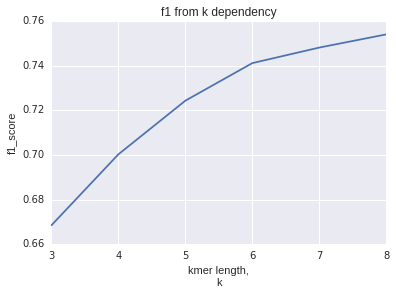

In [99]:
plt.plot(range(3,9),scores)
plt.title("f1 from k dependency")
plt.xlabel("kmer length,\nk")
plt.ylabel("f1_score")

In [11]:
from xgboost import XGBClassifier

/home/fogside/virtualenv/py3/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
xgb = XGBClassifier()

In [104]:
my_cv(xgb, df_dict[8])

0.819498069498
0.814814814815
0.80259222333
MEAN: 0.812301702548


0.81230170254763134

3
0.800779347297
0.787695410993
0.785819793205
MEAN: 0.791431517165
4
0.800783162017
0.807770961145
0.787878787879
MEAN: 0.798810970347
5
0.808468734613
0.810672139559
0.80059970015
MEAN: 0.806580191441
6
0.821971554684
0.814701378254
0.793189784677
MEAN: 0.809954239205
7
0.821463414634
0.805970149254
0.795386158475
MEAN: 0.807606574121
8
0.819498069498
0.814814814815
0.80259222333
MEAN: 0.812301702548


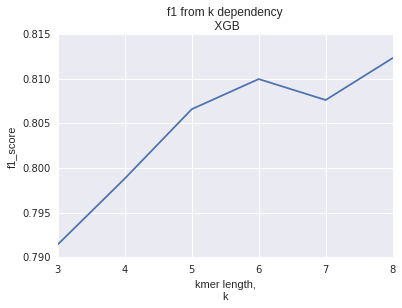

In [105]:
df_dict = {}
scores = []
for k in range(3, 9):
    print(k)
    df_tmp = make_df_from_dic([noncode,code], num_for_class = 3000, kmer=k)
    df_dict[k] = df_tmp
    res = my_cv(xgb, df_tmp)
    scores.append(res)
plt.plot(range(3,9),scores)
plt.title("f1 from k dependency\n XGB")
plt.xlabel("kmer length,\nk")
plt.ylabel("f1_score")

# test on TEST

In [81]:
df_test_human = make_df_from_dic([test_noncode, test_code], kmer=8, num_for_class=3000)

  1%|          | 24/3000 [00:00<00:12, 236.28it/s]

type:  0


  1%|          | 23/3000 [00:00<00:13, 218.42it/s]

type:  1


100%|██████████| 3000/3000 [00:13<00:00, 217.44it/s]


In [83]:
df_test_human.head()

,0,1,10,11,12,13,14,15,16,17,...,91,92,93,94,95,96,97,98,99,TYPE
ENST00000000412.3,-0.020780,0.266829,0.028400,0.047240,0.019998,0.050590,-0.056026,0.153826,-0.069123,-0.027942,...,0.023470,-0.194917,-0.204174,0.181589,-0.047986,-0.058019,-0.124078,-0.127703,-0.041864,1.0
ENST00000002501.6,0.006974,0.291226,-0.066695,0.107407,0.123877,0.175659,-0.215934,0.108930,-0.052624,-0.066919,...,0.104955,-0.200699,-0.306164,0.293668,-0.069772,0.100253,-0.082885,-0.123530,-0.072631,1.0
ENST00000005178.5,-0.055988,0.290624,0.058650,0.074831,-0.001086,0.039430,0.005063,0.128427,-0.028392,-0.011766,...,-0.058732,-0.206171,-0.184977,0.140002,-0.071920,-0.118730,-0.188816,-0.106942,-0.039843,1.0
ENST00000005374.6,-0.031913,0.295317,0.009682,0.042724,-0.021109,0.060888,-0.009953,0.160893,-0.057528,-0.069271,...,-0.049047,-0.219174,-0.187463,0.176764,-0.061204,-0.150797,-0.163936,-0.059616,-0.073246,1.0
ENST00000042381.4,-0.005640,0.270949,-0.074681,0.128724,0.115967,0.129678,-0.166883,0.168572,-0.048348,-0.061452,...,0.084178,-0.216177,-0.286693,0.283724,-0.068113,0.077244,-0.092749,-0.169412,-0.017378,1.0


In [84]:
y = np.array(df_8mer.ix[:,-1], dtype=np.int32)
X = np.array(df_8mer.ix[:,:-1])
xgb.fit(X, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [85]:
y_test = np.array(df_test_human.ix[:,-1], dtype=np.int32)
X_test = np.array(df_test_human.ix[:,:-1])
y_pred = xgb.predict(X_test)

In [86]:
from sklearn.metrics import f1_score

In [87]:
f1_score(y_test, y_pred)

0.81741153015451062

# test on mouse

In [49]:
def test_species(cod_path, non_cod_path):
    coding = read_FASTA(cod_path)
    noncoding = read_FASTA(non_cod_path)
    df_test = make_df_from_dic([noncoding, coding], kmer=8, num_for_class=3000)
    
    y_test = np.array(df_test.ix[:,-1], dtype=np.int32)
    X_test = np.array(df_test.ix[:,:-1])
    y_pred = xgb.predict(X_test)
    
    return f1_score(y_test, y_pred)

In [25]:
mouse_coding = read_FASTA("../../data/another_data/gencode_mouse/gencode.vM12.pc_transcripts.fa")
mouse_noncoding = read_FASTA("../../data/another_data/noncode_mouse/NONCODE2016_mouse.fa")

In [26]:
df_test_mouse = make_df_from_dic([mouse_noncoding, mouse_coding], kmer=8, num_for_class=3000)

In [27]:
y_test_m = np.array(df_test_mouse.ix[:,-1], dtype=np.int32)
X_test_m = np.array(df_test_mouse.ix[:,:-1])
y_pred_m = xgb.predict(X_test_m)
f1_score(y_test_m, y_pred_m)

0.80877526343064432

# test on Drosophila

In [28]:
cod_p = "../../data/another_data/Drosophila/Drosophila_melanogaster.BDGP6.cds.all.fa"
ncod_p = "../../data/another_data/Drosophila/Drosophila_melanogaster.BDGP6.ncrna.fa"
test_species(cod_p, ncod_p)

0.79093745760412437

# test on Zebrafish

In [88]:
cod_p = "../../data/another_data/Danio_rerio/Danio_rerio.GRCz10.cds.all.fa"
ncod_p = "../../data/another_data/Danio_rerio/Danio_rerio.GRCz10.ncrna.fa"
test_species(cod_p, ncod_p)

  2%|▏         | 62/3000 [00:00<00:04, 601.82it/s]

type:  0


  1%|          | 31/3000 [00:00<00:09, 297.04it/s]

type:  1


100%|██████████| 3000/3000 [00:10<00:00, 293.80it/s]


0.76194895591647327

In [106]:
coding = read_FASTA(cod_p)
noncoding = read_FASTA(ncod_p)

# test for long/short accuracy

# short, human

## test lnciPedia 4.0

In [14]:
spec = pd.read_excel("/home/fogside/lncRNA/data/Spectrum.xlsx")

In [15]:
spec.head()

,SpecName,Seq,RT,HI,MS,Prot
0,Locus:2.1.1.1296.9 File:120921_serumPool_wcx_h...,GCSELHSTLDN,"1,784.00",15.48445,Ctrl_001_MGFPeaklist,lnc-RP11-150O12.3.1-3:1_(+2)
1,Locus:1.1.1.2593.5 File:120921_serumPool_wcx_h...,AEFSALEEESGLOKPE,"5,838.00",27.82945,Ctrl_001_MGFPeaklist,lnc-MPP2-1:2_(+1)
2,Locus:1.1.1.2588.7 File:120921_serumPool_wcx_h...,AEFSALEEESGLOKPE,"5,822.00",27.82945,Ctrl_001_MGFPeaklist,lnc-MPP2-1:2_(+1)
3,Locus:3.1.1.767.14 File:120921_serumPool_wcx_h...,SALEEESGLOKPE,695,17.07045,Ctrl_001_MGFPeaklist,lnc-MPP2-1:2_(+1)
4,Locus:1.1.1.1590.2 File:120921_serumPool_wcx_h...,SALEEESGLOKPE,"2,630.00",17.07045,Ctrl_001_MGFPeaklist,lnc-MPP2-1:2_(+1)


In [16]:
from collections import Counter

In [17]:
hit_spec_dic = Counter(spec['Prot'])

In [18]:
hit_spec_dic.most_common()

[('lnc-MAPK15-2:1_(+2)', 148),
 ('lnc-NKD1-3:1_(+1)', 106),
 ('lnc-CEP152-1:1_(+3)', 106),
 ('lnc-ZNF584-1:1_(+1)', 86),
 ('lnc-TRAT1-2:7_(+1)', 66),
 ('lnc-SRPRB-4:1_(+2)', 50),
 ('lnc-NXPH2-3:3_(+1)', 50),
 ('lnc-C1orf216-1:1_(+3)', 49),
 ('lnc-DHRS2-3:1_(+1)', 46),
 ('lnc-RP3-377D14.1.1-3:19_(+3)', 45),
 ('lnc-ZNF519-1:9_(+3)', 39),
 ('lnc-CPEB2-13:1_(+2)', 38),
 ('lnc-ALKBH4-1:1_(+3)', 31),
 ('lnc-SLC22A23-6:1_(+3)', 28),
 ('lnc-SRSF2-1:1_(+2)', 26),
 ('lnc-SNX20-4:1_(+3)', 25),
 ('lnc-ATP5I-1:6_(+1),lnc-ATP5I-1:7_(+3)', 22),
 ('lnc-NKAIN3-1:1_(+3)', 21),
 ('lnc-ELP3-1:1_(+2)', 21),
 ('lnc-C12orf10-1:5_(+1)', 21),
 ('lnc-AGPAT6-3:1_(+1)', 20),
 ('lnc-RARS-5:1_(+3)', 18),
 ('lnc-ATP1A3-1:1_(+2)', 17),
 ('lnc-AZIN1-1:4_(+3)', 17),
 ('DNAJB8-AS1:7_(+2)', 17),
 ('lnc-MPP2-1:2_(+1)', 16),
 ('lnc-NUP214-3:1_(+2)', 16),
 ('LINC01015:2_(+1),LINC01015:4_(+2)', 15),
 ('lnc-GMDS-19:1_(+1)', 15),
 ('lnc-LSMD1-2:2_(+2)', 15),
 ('lnc-SERPINI1-11:1_(+3)', 15),
 ('lnc-PTGDR-2:2_(+3)', 15),
 ('lnc-

In [41]:
lncipedia_4 = read_FASTA("/home/fogside/lncRNA/data/lncipedia_4_0_hc.fasta")

In [47]:
lnc4_df = make_df_from_dic([lncipedia_4], num_for_class=len(lncipedia_4), kmer=8)

  0%|          | 27/80403 [00:00<04:57, 269.89it/s]

type:  0


100%|██████████| 80403/80403 [03:02<00:00, 440.75it/s]


In [94]:
list(lncipedia_4.items())[644][1]

'CTTCACTTTCAGAGACTTCAGCGTTCCATGTCTGCTGTGCTGTGGAACCCAGAGTGCTCTTGCCTGGATGGCTGAGAATCCCTTGGACCCTGGAAGCACCTACTCCATGATGGCCCGCAGGAGGACCAAACTGGAGACAGTCCTGGCTCTGAGGAAACAGGAAGGAAGGAGGGTGAAAGGAACGTCCACCTGCACACAAAGGAAAGATGAAAAAGAGTCACCTACCATGGGACCTGGCAAAGTACTTCAGAACTTTTATTCCTTCCAGAAGCAGGTAAGTACCCCAAGTCCTCATCGTATTCCCAGCATAGGGCTTGGTATACGGGGGGATATTTCATTCAGCATATTGGCTGAATGAAAGGTCTGATAGGTATACCTGGGAGAAGGTCCTTAGGGACATGGCTTAAAAAATGAGAGAGGGGCAGGGCAGTGAGTCTAAAAGGATGTGGATGCTCACATCTGCTCTTACAATCATGCTACAGTTCATTTATTGAGTGGAAACAGTTCCCTACTTATTGACAATTCATTTACTGAATAGGTAATCAGTAAATACATTTTGTATCAATCTAACAATTAGGCATAAACTACAGCCTCCTACACCCAATATCTGAGGTGTTCTAAGATTTAACTACTCAAATGTTTGATATTTGATAAATTGTTTAAGTTCTCTGCAATTCAGTTCCACCTCCTATAACAGCACTTCTGAAAATGTGGTCTGTGAACCTCTGAGGGGTTCCTGAGACACTGTCAGGGAGCAAGTGAGACATGGCTATTTTTATAATATTAAACTATTAGCCTTTGTCACTGTGTTGTCATTTACCTAGGATAGGTAC'

In [92]:
lnc4_df.head()

,0,1,10,11,12,13,14,15,16,17,...,91,92,93,94,95,96,97,98,99,TYPE
A1BG-AS1:4,0.036029,0.286006,-0.072962,0.096971,0.096752,0.095567,-0.217422,0.097726,-0.069422,-0.009610,...,0.122590,-0.196569,-0.281443,0.283634,-0.057258,0.096980,-0.116203,-0.170660,-0.026831,0.0
A1BG-AS1:5,0.030476,0.300949,-0.073210,0.104854,0.122116,0.100656,-0.210483,0.095434,-0.070673,0.009873,...,0.155414,-0.167454,-0.277507,0.262960,-0.055156,0.112796,-0.142341,-0.182145,-0.074393,0.0
A1BG-AS1:6,0.033599,0.285375,-0.044347,0.102738,0.086212,0.093061,-0.197801,0.094905,-0.077900,-0.019881,...,0.145343,-0.197261,-0.285266,0.279878,-0.067034,0.063345,-0.104890,-0.171446,-0.027718,0.0
A1BG-AS1:8,0.053209,0.303587,-0.040555,0.163074,0.075777,0.164370,-0.166042,0.103731,-0.063073,-0.037618,...,0.133503,-0.176494,-0.305441,0.285651,-0.087367,0.044785,-0.085997,-0.143035,-0.034010,0.0
A1BG-AS1:9,0.034189,0.301724,-0.048584,0.101367,0.062436,0.095605,-0.194543,0.088817,-0.079353,-0.019320,...,0.131745,-0.196624,-0.306341,0.280009,-0.080239,0.038836,-0.106274,-0.163400,-0.041809,0.0


In [89]:
len([k[:-5].upper() for k in hit_spec_dic.keys()])

1429

In [100]:
intersection = set([k.upper() for k in lnc4_df.index]) & set([k[:-5].upper() for k in hit_spec_dic.keys()])
len(intersection)

1281

In [91]:
len(set([k.upper() for k in lncipedia_4.keys()]) & set([k[:-5].upper() for k in hit_spec_dic.keys()]))

1281

# Те, что не нашлись

In [132]:
len(set([k[:-5].upper() for k in hit_spec_dic.keys()]) - set([k.upper() for k in lncipedia_4.keys()]))

115

## Сам тест:
1) Предсказываем на всей lncipedia4

2) Предсказываем только на пересечении найденных

In [130]:
lnc4_pred = xgb.predict(np.array(lnc4_df.ix[:, :-1]))

In [131]:
np.sum(lnc4_pred)

15723

#### Пересечение

In [129]:
lnc4_pred_1 = xgb.predict(np.array(lnc4_df.ix[intersection, :-1]))
np.sum(lnc4_pred_1)

41

In [140]:
with open("Coding_by_model_and_ms_lncip4.csv", 'w') as fn:
    for s in lnc4_df.ix[intersection, :-1].ix[lnc4_pred_1==1].index:
        print(s)
        fn.write(s+'\n')

LINC00886:1
HOXA10-AS:2
GNAS-AS1:10
LINC00467:10
SGMS1-AS1:2
LINC01488:1
TRAF3IP2-AS1:1
ZNF571-AS1:1
LINC00211:4
MFI2-AS1:13
ZNF295-AS1:4
WT1-AS:10
LINC00607:1
LOXL1-AS1:21
LINC01435:8
LINC00589:3
TMEM72-AS1:2
KCNJ2-AS1:2
CTBP1-AS2:4
LINC-PINT:18
H1FX-AS1:3
LINC01124:8
H19:2
ITGA9-AS1:20
MCPH1-AS1:4
LINC00941:4
LINC00463:2
LINC01471:13
LINC00894:1
UGDH-AS1:1
DANT1:2
DNAJC3-AS1:2
GATA2-AS1:1
PRKCQ-AS1:9
FBXL19-AS1:2
LINC01104:1
LINC01591:4
MAFG-AS1:4
LINC00384:1
SLC25A5-AS1:6
CDRT7:1


### С предсказанием вероятностей

In [127]:
lnc4_pred_1_proba = xgb.predict_proba(np.array(lnc4_df.ix[intersection, :-1]))
# np.sum(lnc4_pred_1)

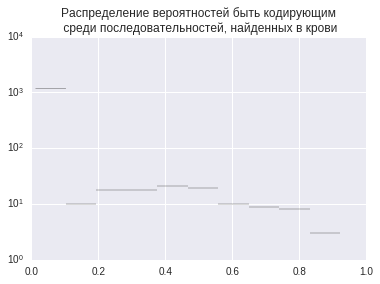

In [128]:
plt.hist(lnc4_pred_1_proba[:, 1])
plt.semilogy()
plt.title("Распределение вероятностей быть кодирующим\n среди последовательностей, найденных в крови")
plt.show()

In [123]:
df_8mer_1 = make_df_from_dic([noncode,code], num_for_class = 8000, kmer=8)

  1%|          | 41/8000 [00:00<00:19, 406.95it/s]

type:  0


  0%|          | 17/8000 [00:00<00:47, 167.78it/s]

type:  1


100%|██████████| 8000/8000 [00:39<00:00, 202.82it/s]


In [125]:
y = np.array(df_8mer_1.ix[:,-1], dtype=np.int32)
X = np.array(df_8mer_1.ix[:,:-1])
xgb.fit(X, y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)